# 10.09.23

# **Introduction to Scikit-learn**

## Scikit-learn (also referred as sklearn) is a python library widely used for machine learning.
## It's characterized by a clean, uniform and streamlined API.

## ML is a branch of AI that aims at building systems that can learn from data, identify patteran and make decisions with minimal human intervention.

## The objective here is to introduce the usage of a scikit-learn for different stages of ML model building.



## The diff stages to be followed in ML model building is shown below:

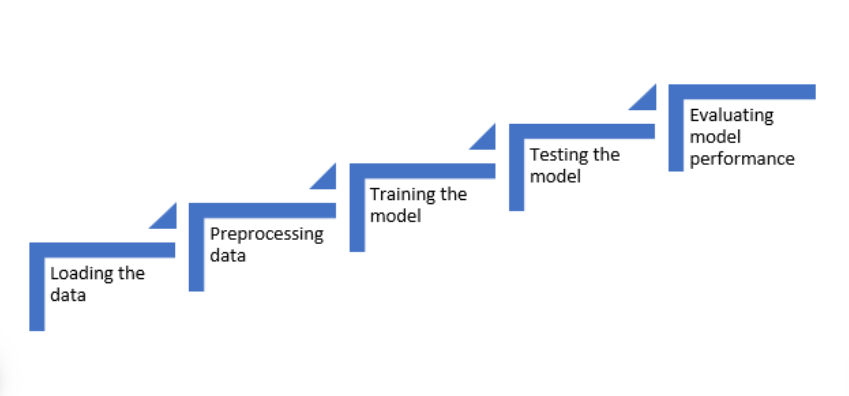

## Porb. Statement: Engineers as XYZ Custom Cars now want to create a ML model that can predict the mpg of any car that comes to their garage. MPG refers to miles per gallon.

## Solution: A Linear Regression model is to be made for this problem.


# **Loading the Data**

## Let's start with loading the data:

In [1]:
import pandas as pd

df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/PYTHON FOR DS/0.FILES TO BE USED/auto_mpg.csv')
df

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
0,18.0,8,307.0,130.0,3504,12.0,70,usa,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,usa,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,usa,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,usa,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,usa,ford torino
...,...,...,...,...,...,...,...,...,...
393,27.0,4,140.0,86.0,2790,15.6,82,usa,ford mustang gl
394,44.0,4,97.0,52.0,2130,24.6,82,europe,vw pickup
395,32.0,4,135.0,84.0,2295,11.6,82,usa,dodge rampage
396,28.0,4,120.0,79.0,2625,18.6,82,usa,ford ranger


# **Data Preprocessing**

## Let's use DataFrame.info() to get to know about the data properties:

In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    392 non-null    float64
 4   weight        398 non-null    int64  
 5   acceleration  398 non-null    float64
 6   model_year    398 non-null    int64  
 7   origin        398 non-null    object 
 8   name          398 non-null    object 
dtypes: float64(4), int64(3), object(2)
memory usage: 28.1+ KB


## Dropping NULL Values:

In [3]:
df.dropna(inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 392 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           392 non-null    float64
 1   cylinders     392 non-null    int64  
 2   displacement  392 non-null    float64
 3   horsepower    392 non-null    float64
 4   weight        392 non-null    int64  
 5   acceleration  392 non-null    float64
 6   model_year    392 non-null    int64  
 7   origin        392 non-null    object 
 8   name          392 non-null    object 
dtypes: float64(4), int64(3), object(2)
memory usage: 30.6+ KB


## Predictors and Target

### The target variable is 'mpg' which has to be predicted. The predictors are the variables that are used to predict the target.
### Here, except name of the car, all other variables are included as predictors.

### Creating a matrix of predictors:

In [4]:
x = df.iloc[:, 1:8]

### Creating target:

In [5]:
y = df.iloc[:, 0]

### Sice, the origin feature is a categorical variable, get_dummies() function can be used from Pandas to encode it as shown below:

In [7]:
x = pd.get_dummies(x)
x

,cylinders,displacement,horsepower,weight,acceleration,model_year,origin_europe,origin_japan,origin_usa
0,8,307.0,130.0,3504,12.0,70,0,0,1
1,8,350.0,165.0,3693,11.5,70,0,0,1
2,8,318.0,150.0,3436,11.0,70,0,0,1
3,8,304.0,150.0,3433,12.0,70,0,0,1
4,8,302.0,140.0,3449,10.5,70,0,0,1
...,...,...,...,...,...,...,...,...,...
393,4,140.0,86.0,2790,15.6,82,0,0,1
394,4,97.0,52.0,2130,24.6,82,1,0,0
395,4,135.0,84.0,2295,11.6,82,0,0,1
396,4,120.0,79.0,2625,18.6,82,0,0,1


### From the data shown above, it can be observed that the categorical variable 'origin' has been encoded with 0s and 1s.

# **Training and Test Split**

## The data must be divided into two parts - first, a training set on which model can be trained, and second, a testing set on which the model can be validated.

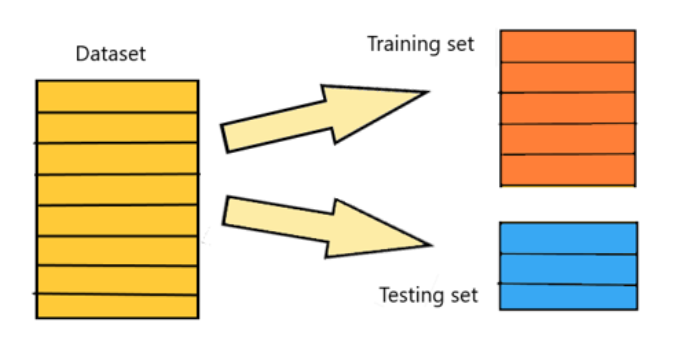

## The Sklearn library is used for this as shown below:

In [8]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 0)

### x_train and y_train correspondn to training predictors and target respectively.

### x_test and y_test correspond to testing predictors and target respectively.

### 'test_size = 0.2' represents that 20% of the data will be used as test set.

# **Applying Standard Scaler on the Data**

## Since, all the variables in the data are with different units of measurements and different scales, it would be a good idea to standardize them.

## A standard scaler performs this operation by transforming the columns such that the mean of every column or variable is 0 and standard deviation is 1.

### Applying std. scaler on the data:

In [11]:
from sklearn.preprocessing import StandardScaler

scale = StandardScaler()

scale.fit_transform(x_train)

scale.transform(x_test);
# remove the semicolon put above and run the cell

# **Importing Linear Regression**

## The linear regression model is used to build the model.

## A linear regression model uses the following equation:

> y = B0 + B1*X1 + B2*X2 + _ _ _ + Bn*Xn

## In this case, y refers to the target and X1, X2,...Xn refer to the predictors. B0 is the intercept and B1, B2,...Bn are the coefficients.



## Building Linear Regression Model using Sklearn library on the training data set:

In [14]:
# importing and fitting the model on training set
from sklearn.linear_model import LinearRegression

reg = LinearRegression()

# fitting the model on training data
reg.fit(x_train, y_train)

# checking the coefficients(slope) and intercept.
# 'm' represents the coefficients and 'c' represents the intercpt
m = reg.coef_
c = reg.intercept_
m,c

(array([-0.38946904,  0.02158376, -0.01237154, -0.00700083,  0.12954429,
         0.76774449,  0.83388251,  0.71982383, -1.55370633]),
 -16.20312300058097)

## Next, the linear regression model created is used for prediction against the training and testing data set:

In [17]:
# Predicting the target 'mpg' against the predictors in the training data set
# predicted data stored in y_pred_train
y_pred_train = reg.predict(x_train)

# Preding the target 'mpg' against the predictors in the testing data set
# predicted data stored in y_pred_test
y_pred_test = reg.predict(x_test)

# **Model Evluation**

## There are different metrices used to evaluate the performance of the model.

## Here, the R Square score is used.

## Evaluating performance on training set.

### Prediction Accuracy in terms of how close is the predicted value of target 'mpg' to the real value in training data set:

In [19]:
from sklearn.metrics import r2_score

r2_score_train = r2_score(y_train, y_pred_train)
r2_score_train

0.8194239716903473

### The accuracy comes out to be 81%.

## Evaluating performance on the test set.

### Prediction Accuracy in terms of how close the predicted value of target 'mpg' to the real value in testing data set:

In [20]:
from sklearn.metrics import r2_score

r2_score_test = r2_score(y_test, y_pred_test)
r2_score_test

0.8387519287083123

### The accuracy comes out to be 83%.

## Thus, scikit-learn helps to train, test and evaluate machine learning models.